# Linear Regression with SGD
> Linear Regression from scratch with SGD

- toc: true 
- badges: true
- comments: true
- categories: [Machine Learning]

In case we cannot solve models analytically, we still train models effectively in practice. The algorithm optimize parameters in the direction that incrementally lowvers the loss function is called *gradient descent*.

We will often settle for sampling a random minibatch of examples every time we need to compute the update, a variant called *minibatch stochastic gradient descent*.

In each interation, we first randomly sample a minibatch $\beta$ consisting of a fixed number of training examples. We then compute the gradient of the average loss on the minibatch with regard to the model parameters. Finally, we multiply the gradient by a positive value $\eta$ and subtract the result from the current parameters values.

$$ \mathbf{w} \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}\mathbf{w}$$



# Generating the Dataset

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
X, y = synthetic_data(true_w, true_b, 1000)

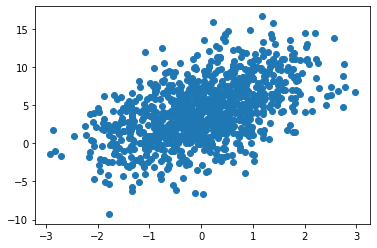

In [3]:
plt.scatter(x=X[:,0].numpy(),y=y[:,0].numpy())

# Reading the Dataset

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

# Initalizing the Parameters

In [5]:
w = tf.Variable(tf.random.normal(shape=(3,1), mean=0, stddev=0.01),trainable=True)

# Defining the Model

In [6]:
def linreg(X,w):
    return tf.matmul(X,w)

# Defining the Loss Function

In [7]:
def squared_loss(y_hat,y):
    return (y_hat-y)**2/2

# Defining the Optimizatioin Algorithm

In [8]:
def sgd(w, grad, lr, batch_sizze):
    w.assign_sub(lr*grad/batch_sizze)

# Training

In [9]:
X=tf.concat([X,tf.ones(y.shape)],1)

In [10]:
lr = 0.03
num_epochs = 10
net = linreg
loss = squared_loss
batch_size = 100
for epoch in range(num_epochs):
    for X_, y_ in data_iter(batch_size, X, y):
        with tf.GradientTape() as g:
            l = loss(net(X_, w), y_)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw = g.gradient(l, w)
        # Update parameters using their gradient
        sgd(w, dw, lr, batch_size)
    train_l = loss(net(X, w), y)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 9.072795
epoch 2, loss 4.911858
epoch 3, loss 2.659815
epoch 4, loss 1.440408
epoch 5, loss 0.780151
epoch 6, loss 0.422553
epoch 7, loss 0.228911
epoch 8, loss 0.124030
epoch 9, loss 0.067223
epoch 10, loss 0.036443


In [11]:
w

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9193369],
       [-3.2431753],
       [ 3.9959464]], dtype=float32)>